# 数学建模笔记

这个数学建模笔记是基于华中科技大学马世拓老师的课程（[数学建模导论：基于Python语言]( https://b23.tv/nSu6Jah)）进行记录的，希望大家能给马老师多多三连支持一下

## 线性规划模型
### 1.1 线性规划模型
线代的基础知识，这个没什么好说的
线性规划的标准形式：
$$
    \min_X C^TX\quad s.t.\begin{cases} Ax\leq b\\ AeqX=beq\\ lb \leq X\leq ub\end{cases}
$$
解决方法：
- 单纯形法
固定变量，不断变换基向量求方程组的解带入，看是不是最优解，如果不是就继续更行迭代现阶段的解
- 蒙特卡洛法
在可行域范围内生成大批量随机数据点，观察这些数据点在什么位置取得近似最优，更适用于解决非线性问题
- 引入松弛变量：不等式约束变为等式约束，解决绝对值问题，不等式过多甚至到了非线性
$$
        \max z=x_1+2x_2 \quad s.t.\begin{cases}-3x_1+2x_2\leq3\\ x_1\leq2\\ x_1-x_2\leq1,\\ x_1x_2\geq0\end{cases}\Rightarrow\begin{cases}x_3=3x_1-2x_2+3\\ x_4=-x_1-x_2+2\leq2\\ x_5=1-x_1+x_2\leq1,\\ x_1,x_2,x_3,x_4,x_5\geq0\end{cases}
$$

例题：$\max z=2x_1+3x_2-5x_3$
$$
s.t.\begin{cases}x_1+x_2+x_3=7\\ 2x_1-5x_2+x_3 \geq10\\ x_1+3x_2+x_3\leq 12\\ x_1,x_2,x_3\geq 0\end{cases}
$$


In [7]:
from scipy import optimize
import numpy as np

c = np.array([2,3,-5])
A = np.array([[-2,5,-1],[1,3,1]])
b = np.array([-10,12])
Aeq = np.array([[1,1,1]])
beq = np.array([7])
x1, x2, x3 = (0,None), (0,None), (0,None)
"""
    Linear programming: minimize a linear objective function subject to linear
    equality and inequality constraints.

    Linear programming solves problems of the following form:

    .. math::

        \min_x \ & c^T x \\
        \mbox{such that} \ & A_{ub} x \leq b_{ub},\\
        & A_{eq} x = b_{eq},\\
        & l \leq x \leq u ,

    where :math:`x` is a vector of decision variables; :math:`c`,
    :math:`b_{ub}`, :math:`b_{eq}`, :math:`l`, and :math:`u` are vectors; and
    :math:`A_{ub}` and :math:`A_{eq}` are matrices.

    Alternatively, that's:

        - minimize ::

            c @ x

        - such that ::

            A_ub @ x <= b_ub
            A_eq @ x == b_eq
            lb <= x <= ub

    Note that by default ``lb = 0`` and ``ub = None``. Other bounds can be
    specified with ``bounds``.

    Parameters
    ----------
    c : 1-D array
        The coefficients of the linear objective function to be minimized.
    A_ub : 2-D array, optional
        The inequality constraint matrix. Each row of ``A_ub`` specifies the
        coefficients of a linear inequality constraint on ``x``.
    b_ub : 1-D array, optional
        The inequality constraint vector. Each element represents an
        upper bound on the corresponding value of ``A_ub @ x``.
    A_eq : 2-D array, optional
        The equality constraint matrix. Each row of ``A_eq`` specifies the
        coefficients of a linear equality constraint on ``x``.
    b_eq : 1-D array, optional
        The equality constraint vector. Each element of ``A_eq @ x`` must equal
        the corresponding element of ``b_eq``.
    bounds : sequence, optional
        A sequence of ``(min, max)`` pairs for each element in ``x``, defining
        the minimum and maximum values of that decision variable.
        If a single tuple ``(min, max)`` is provided, then ``min`` and ``max``
        will serve as bounds for all decision variables.
        Use ``None`` to indicate that there is no bound. For instance, the
        default bound ``(0, None)`` means that all decision variables are
        non-negative, and the pair ``(None, None)`` means no bounds at all,
        i.e. all variables are allowed to be any real.
    method : str, optional
        The algorithm used to solve the standard form problem.
        :ref:`'highs' <optimize.linprog-highs>` (default),
        :ref:`'highs-ds' <optimize.linprog-highs-ds>`,
        :ref:`'highs-ipm' <optimize.linprog-highs-ipm>`,
        :ref:`'interior-point' <optimize.linprog-interior-point>` (legacy),
        :ref:`'revised simplex' <optimize.linprog-revised_simplex>` (legacy),
        and
        :ref:`'simplex' <optimize.linprog-simplex>` (legacy) are supported.
        The legacy methods are deprecated and will be removed in SciPy 1.11.0.
"""
optimize.linprog(-c,A,b,Aeq,beq,method='highs',bounds=(x1,x2,x3))

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -14.571428571428571
              x: [ 6.429e+00  5.714e-01  0.000e+00]
            nit: 3
          lower:  residual: [ 6.429e+00  5.714e-01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  7.143e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.286e+00]
        ineqlin:  residual: [ 0.000e+00  3.857e+00]
                 marginals: [-1.429e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### 1.2 非线性规划模型
目标函数非线性，约束条件非线性，如：
$$
    \min f=2x_1^2+3x_1x_3-x_2^2\quad s.t.\begin{cases}x_1^2-2x_2+3x_3=4\\ x_1+x_2-x_3\leq6\\ 2x_1-x_2+x_3\leq15 \\ x_1,x_2,x_3\geq0\end{cases}
$$
补充知识：多元函数相关知识，不多赘述

KKT条件：详情可以参考Blog:<a href="https://zhuanlan.zhihu.com/p/38163970">Karush-Kuhn-Tucker (KKT)条件</a>
将不等式约束包含进去

例题：三台火电机组的运行成本(单位：t/h)与出力限制(单位：MW)分别如下：
$$\begin{aligned}F_{\mathrm{G1}}&=4+0.3P_{\mathrm{Gl}}+0.0007P_{\mathrm{Gl}}^2,100\leqslant P_{\mathrm{Gl}}\leqslant200\\ F_{\mathrm{G2}}&=3+0.32P_{\mathrm{G2}}+0.0004P_{\mathrm{G2}}^2,120\leqslant P_{\mathrm{G2}}\leqslant250\\ F_{\mathrm{G3}}&=3.5+0.3P_{\mathrm{G3}}+0.00045P_{\mathrm{G3}}^2,150\leqslant P_{\mathrm{G3}}\leqslant300\end{aligned}
$$
当负荷为 700MW 时,求经济调度的结果。

In [1]:
from scipy import optimize
import numpy as np

def f(x):
    return 10.5+0.3*x[0]+0.32*x[1]+0.3*x[2]+0.0007*x[0]**2+0.0004*x[1]**2+0.00045*x[2]**2
constraint = ({'type':'eq', 'fun':lambda x: x[0]+x[1]+x[2]-700},{'type':'ineq', 'fun':lambda x: x[0]**2+x[1]**2+x[2]**2})
"""
    fun->迭代函数
    method->迭代方法
    x0->初值
    bounds->自变量范围
    constraints->限制条件,格式({'type':'eq' or 'ineq','fun': lambda x:...},{})
    不等式对应lambda表达式返回值大于0
"""
optimize.minimize(fun=f, method='L-BFGS-B',x0=np.array([100,120,150]),bounds=((100,200), (120,250), (150, 300)), constraints=constraint)

D:\Anaconda\envs\dl\Lib\site-packages\scipy\optimize\_minimize.py:576: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 146.785
        x: [ 1.000e+02  1.200e+02  1.500e+02]
      nit: 0
      jac: [ 4.400e-01  4.160e-01  4.350e-01]
     nfev: 4
     njev: 1
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [16]:
"""遗传算法"""
from sko.GA import GA
def f(x):
    return 10.5+0.3*x[0]+0.32*x[1]+0.3*x[2]+0.0007*x[0]**2+0.0004*x[1]**2+0.00045*x[2]**2

constraint = [lambda x: x[0]+x[1]+x[2]-700]
"""
func : function
        The func you want to do optimal
    n_dim : int
        number of variables of func
    lb : array_like
        The lower bound of every variables of func
    ub : array_like
        The upper bound of every vaiiables of func
    constraint_eq : list
        equal constraint
    constraint_ueq : list
        unequal constraint
    precision : array_like
        The precision of every vaiiables of func
    size_pop : int
        Size of population
    max_iter : int
        Max of iter
    prob_mut : float between 0 and 1
        Probability of mutation
        """
ga = GA(func=f, n_dim=3,size_pop=500,max_iter=500,constraint_eq=constraint,lb=[100,120,150],ub=[200,250,300])
ga.run()

(array([170.67217172, 233.7993253 , 295.52850297]), array([306.73282268]))

#### 案例1 
某公司有6个建筑工地要开工，每个工地的位置(用平面坐标系a,b表示，距离单位：千米)及水泥日用 量d(吨)由下表给出。规划设立两个料场位于A，B,日储量各为20吨。假设从料场到工地之间均有 直线道路相连，试确定料场的位置，并制定每天的供应计划，即从A，B两料场分别向各工地运送多 少吨水泥，使总的吨千米数最小。
![](./image/1.2.1.png)
#### 案例2
某单位领导在考虑本单位职工的升级调资方案时，要求相关部门遵守以下的规定： 
 (1) 年工资总额不超过1500000元；
 (2) 每级的人数不超过定编规定的人数；
 (3)II、III级的升级面尽可能达到现有人数的20%,
 (4) III级不足编制的人数可录用新职工，又I级的职工中有10%的人要退休.相关资料汇总于表中，试为单位领导拟定一个满足要求的调资方案。
![](./image/1.2.2.png)

In [16]:
# 案例1

In [1]:
# 案例2
import torch
torch.cuda.empty_cache()

### 1.3整数规划模型
纯整数规划，混合整数规划，0-1规划
#### 指派问题
假设n个人恰好做n项工作，第i个人做第j项工作的效率为$c_\mathrm{ij}$ 20, 应指派哪个人完成哪项任务，使完成效率最高。
决策变量： $x_{ij}=\begin{cases}1, 指派第$i$人完成第$j$项任务0\\0不指派第$i$人完成第$j$项任务\end{cases}$
目标函数:$\min z = C\textcircled{\cdot}X$
约束条件：$\begin{cases}\sum_ix_{ij}=1,j=1,2,\ldots,n\\ \sum_jx_{ij}=1,i=1,2,\ldots,n\\ x_{ij}=1\text{或}0\end{cases}$
解决方法
- 分支定界法
- 匈牙利法

例题；为了便于对模型进行求解与分析，假设有 4 件事 4 个人去做，各变里对应的数据假设如表1。
![](./image/1.3.1.png)

In [23]:
import scipy
from scipy.optimize import linear_sum_assignment
import numpy as np
cost = np.array([[25,29,31,42], [39,38,26,20], [34,27,28,40], [24,42,36,23]])
"""
 Parameters
    ----------
    cost_matrix : array
        The cost matrix of the bipartite graph.
    
    maximize : bool (default: False)
        Calculates a maximum weight matching if true.
    
    Returns
    -------
    row_ind, col_ind : array
        An array of row indices and one of corresponding column indices giving
        the optimal assignment. The cost of the assignment can be computed
        as ``cost_matrix[row_ind, col_ind].sum()``. The row indices will be
        sorted; in the case of a square cost matrix they will be equal to
        ``numpy.arange(cost_matrix.shape[0])``.
"""
cost[linear_sum_assignment(cost)].sum()

101

### 1.4动态规划模型
如经典的汉诺塔问题，背包问题

### 1.5贪心策略

# 微分方程

In [10]:
"""求解微分方程"""

import sympy

y = sympy.symbols('y',cls=sympy.Function)
x = sympy.symbols('x')
eq = sympy.Eq(y(x).diff(x,2)+4*y(x).diff(x,1)+29*y(x), 0)
print(sympy.dsolve(eq,y(x)))

C1 = sympy.symbols('C1')
C2 = sympy.symbols('C2')
print(((C1*sympy.sin(5*x) + C2*sympy.cos(5*x))*sympy.exp(-2*x)).diff(x,1))

Eq(y(x), (C1*sin(5*x) + C2*cos(5*x))*exp(-2*x))
-2*(C1*sin(5*x) + C2*cos(5*x))*exp(-2*x) + (5*C1*cos(5*x) - 5*C2*sin(5*x))*exp(-2*x)


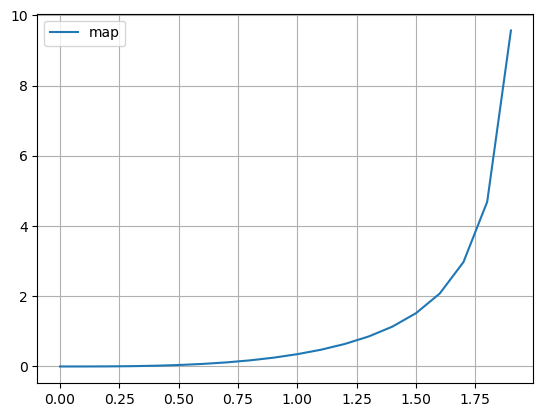

In [22]:
import numpy as np
import sympy
import scipy
import matplotlib.pyplot as plt
"""数值解"""
y_prime = lambda y,x: x**2+y**2
x_h = np.arange(0,2,0.1)
y_pred = scipy.integrate.odeint(y_prime, 0, x_h)
plt.plot(x_h, y_pred,label='map')
plt.legend()
plt.grid()

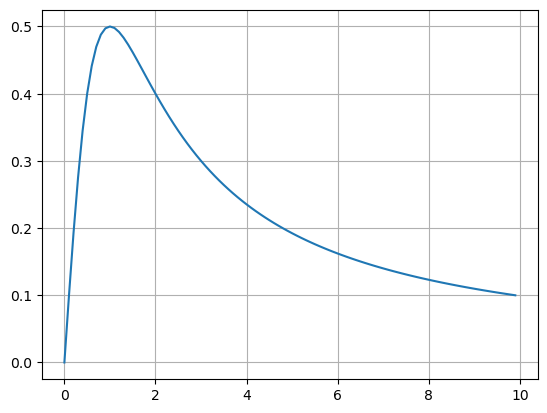

In [17]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
y_prime= lambda y,x: 1/(x**2+1)-2*y**2

x_h = np.arange(0,10,0.1)
y_pred = scipy.integrate.odeint(y_prime,0,x_h)
plt.plot(x_h, y_pred)
plt.grid()

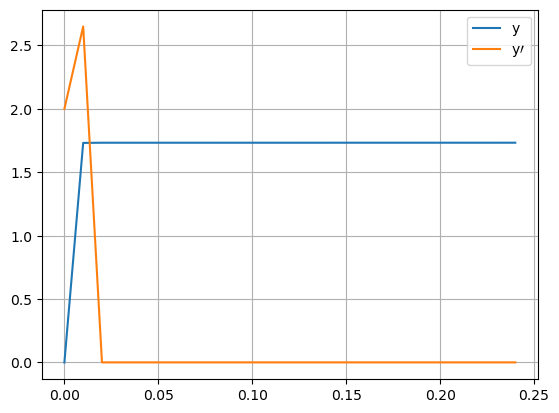

In [20]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
"""高阶常微分方程，必须变量替换，化为一阶微分方程组，再用odeint求解"""
def y_vec(y,t): 
    y_p = y[1]
    y_pp = 1000*(1-y[0]**2)*y[1]+y[0]
    return [y_p,y_pp]

x_h = np.arange(0,0.25,0.01)
y0 = [0, 2]
y_pred = scipy.integrate.odeint(y_vec,y0,x_h)# 默认t在后面
plt.plot(x_h, y_pred[:,0],label='y')
plt.plot(x_h, y_pred[:,1],label='y$\prime$')
plt.legend()
plt.grid()

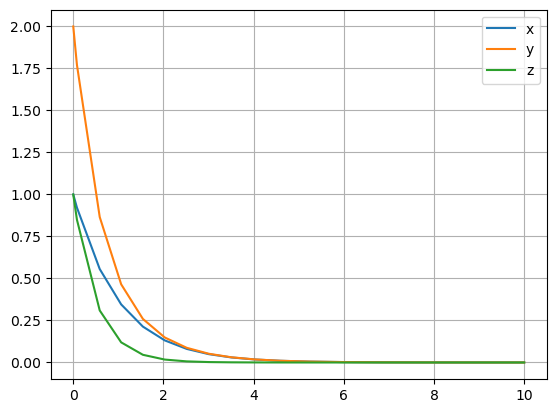

In [30]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt

def f_vec(t,w):
    x = w[0]
    y = w[1]
    z = w[2]
    return [2*x-3*y+3*z,4*x-5*y+3*z,4*x-4*y+2*z]

res = scipy.integrate.solve_ivp(f_vec,(0,10),[1,2,1])# 默认t在y前面
t = res.t
f_pred = res.y
plt.plot(t, f_pred[0,:],label='x')
plt.plot(t, f_pred[1,:],label='y')
plt.plot(t, f_pred[2,:],label='z')
plt.legend()
plt.grid()

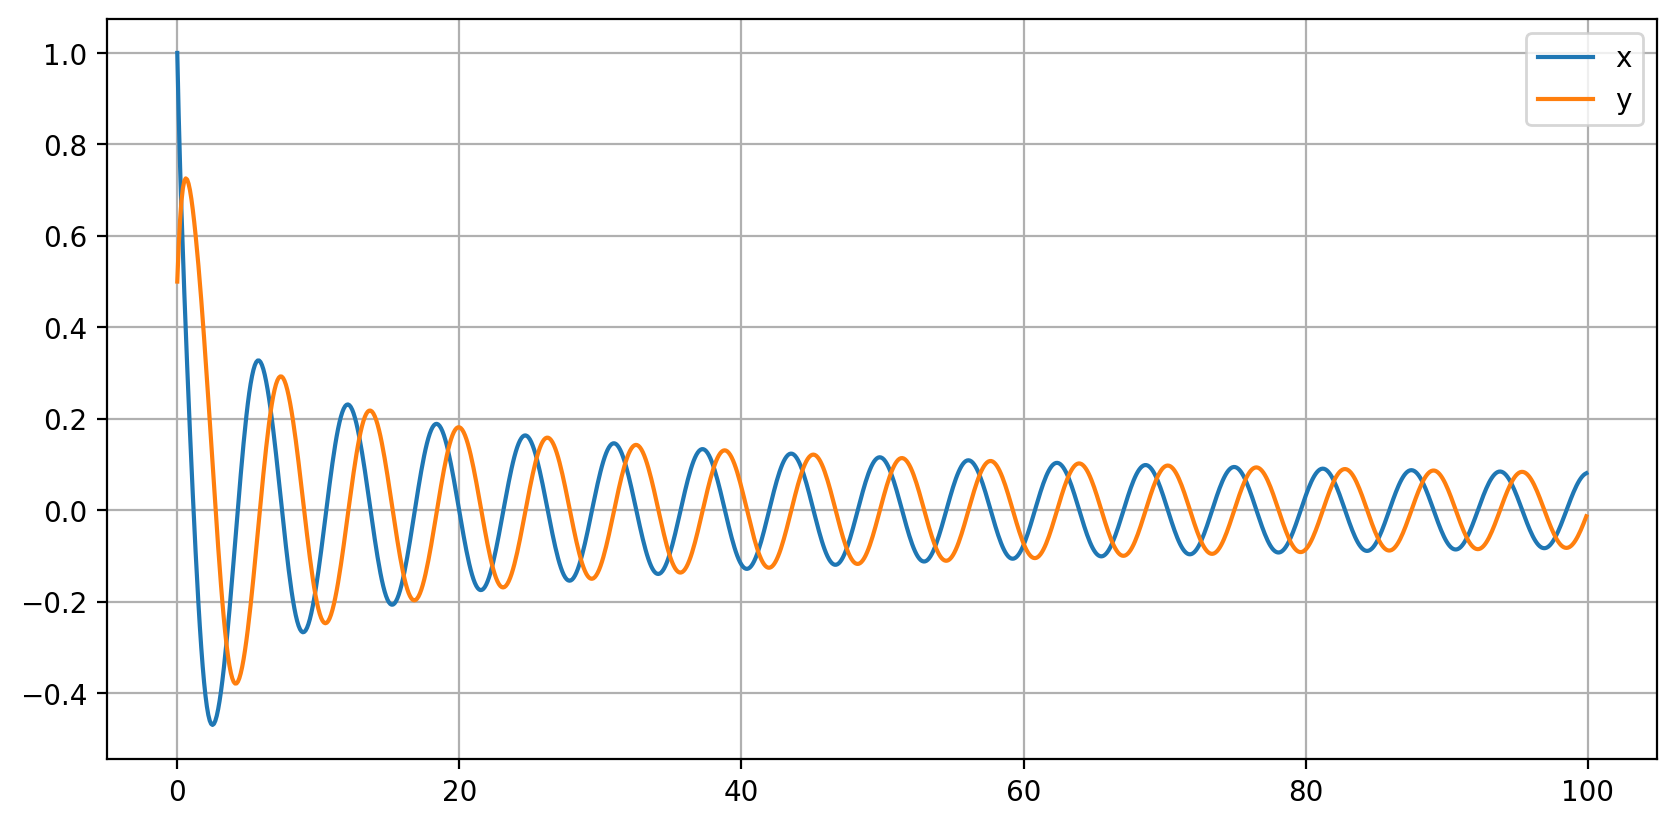

In [39]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt

def f_vec(t,w):
    x = w[0]
    y = w[1]
    return [-x**3-y,-y**3+x]

res = scipy.integrate.solve_ivp(f_vec,(0,100),[1,0.5],t_eval=np.arange(0,100,0.1))# 默认t在y前面
t = res.t
f_pred = res.y
plt.figure(figsize=(10,4.8),dpi=200)
plt.plot(t, f_pred[0,:],label='x')
plt.plot(t, f_pred[1,:],label='y')
plt.legend()
plt.grid()

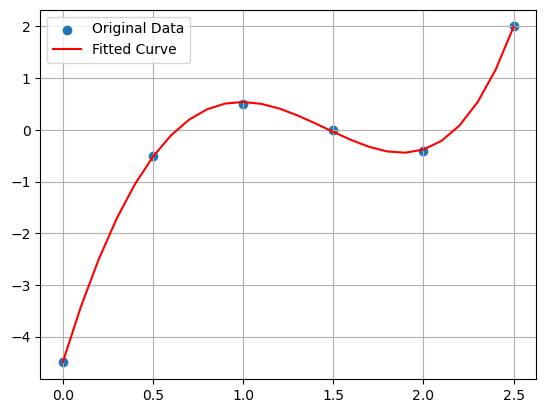

In [20]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
"""多项式拟合"""
x = np.arange(0,3,0.5)
y = np.array([-4.5,-0.5,0.5,0,-0.4,2])
res = np.polyfit(x,y,4)
x_h = np.arange(0,2.6,0.1)
y_pred = np.polyval(res, x_h)
plt.scatter(x, y, label='Original Data')
plt.plot(x_h , y_pred, 'r-', label='Fitted Curve')
plt.legend()
plt.grid()

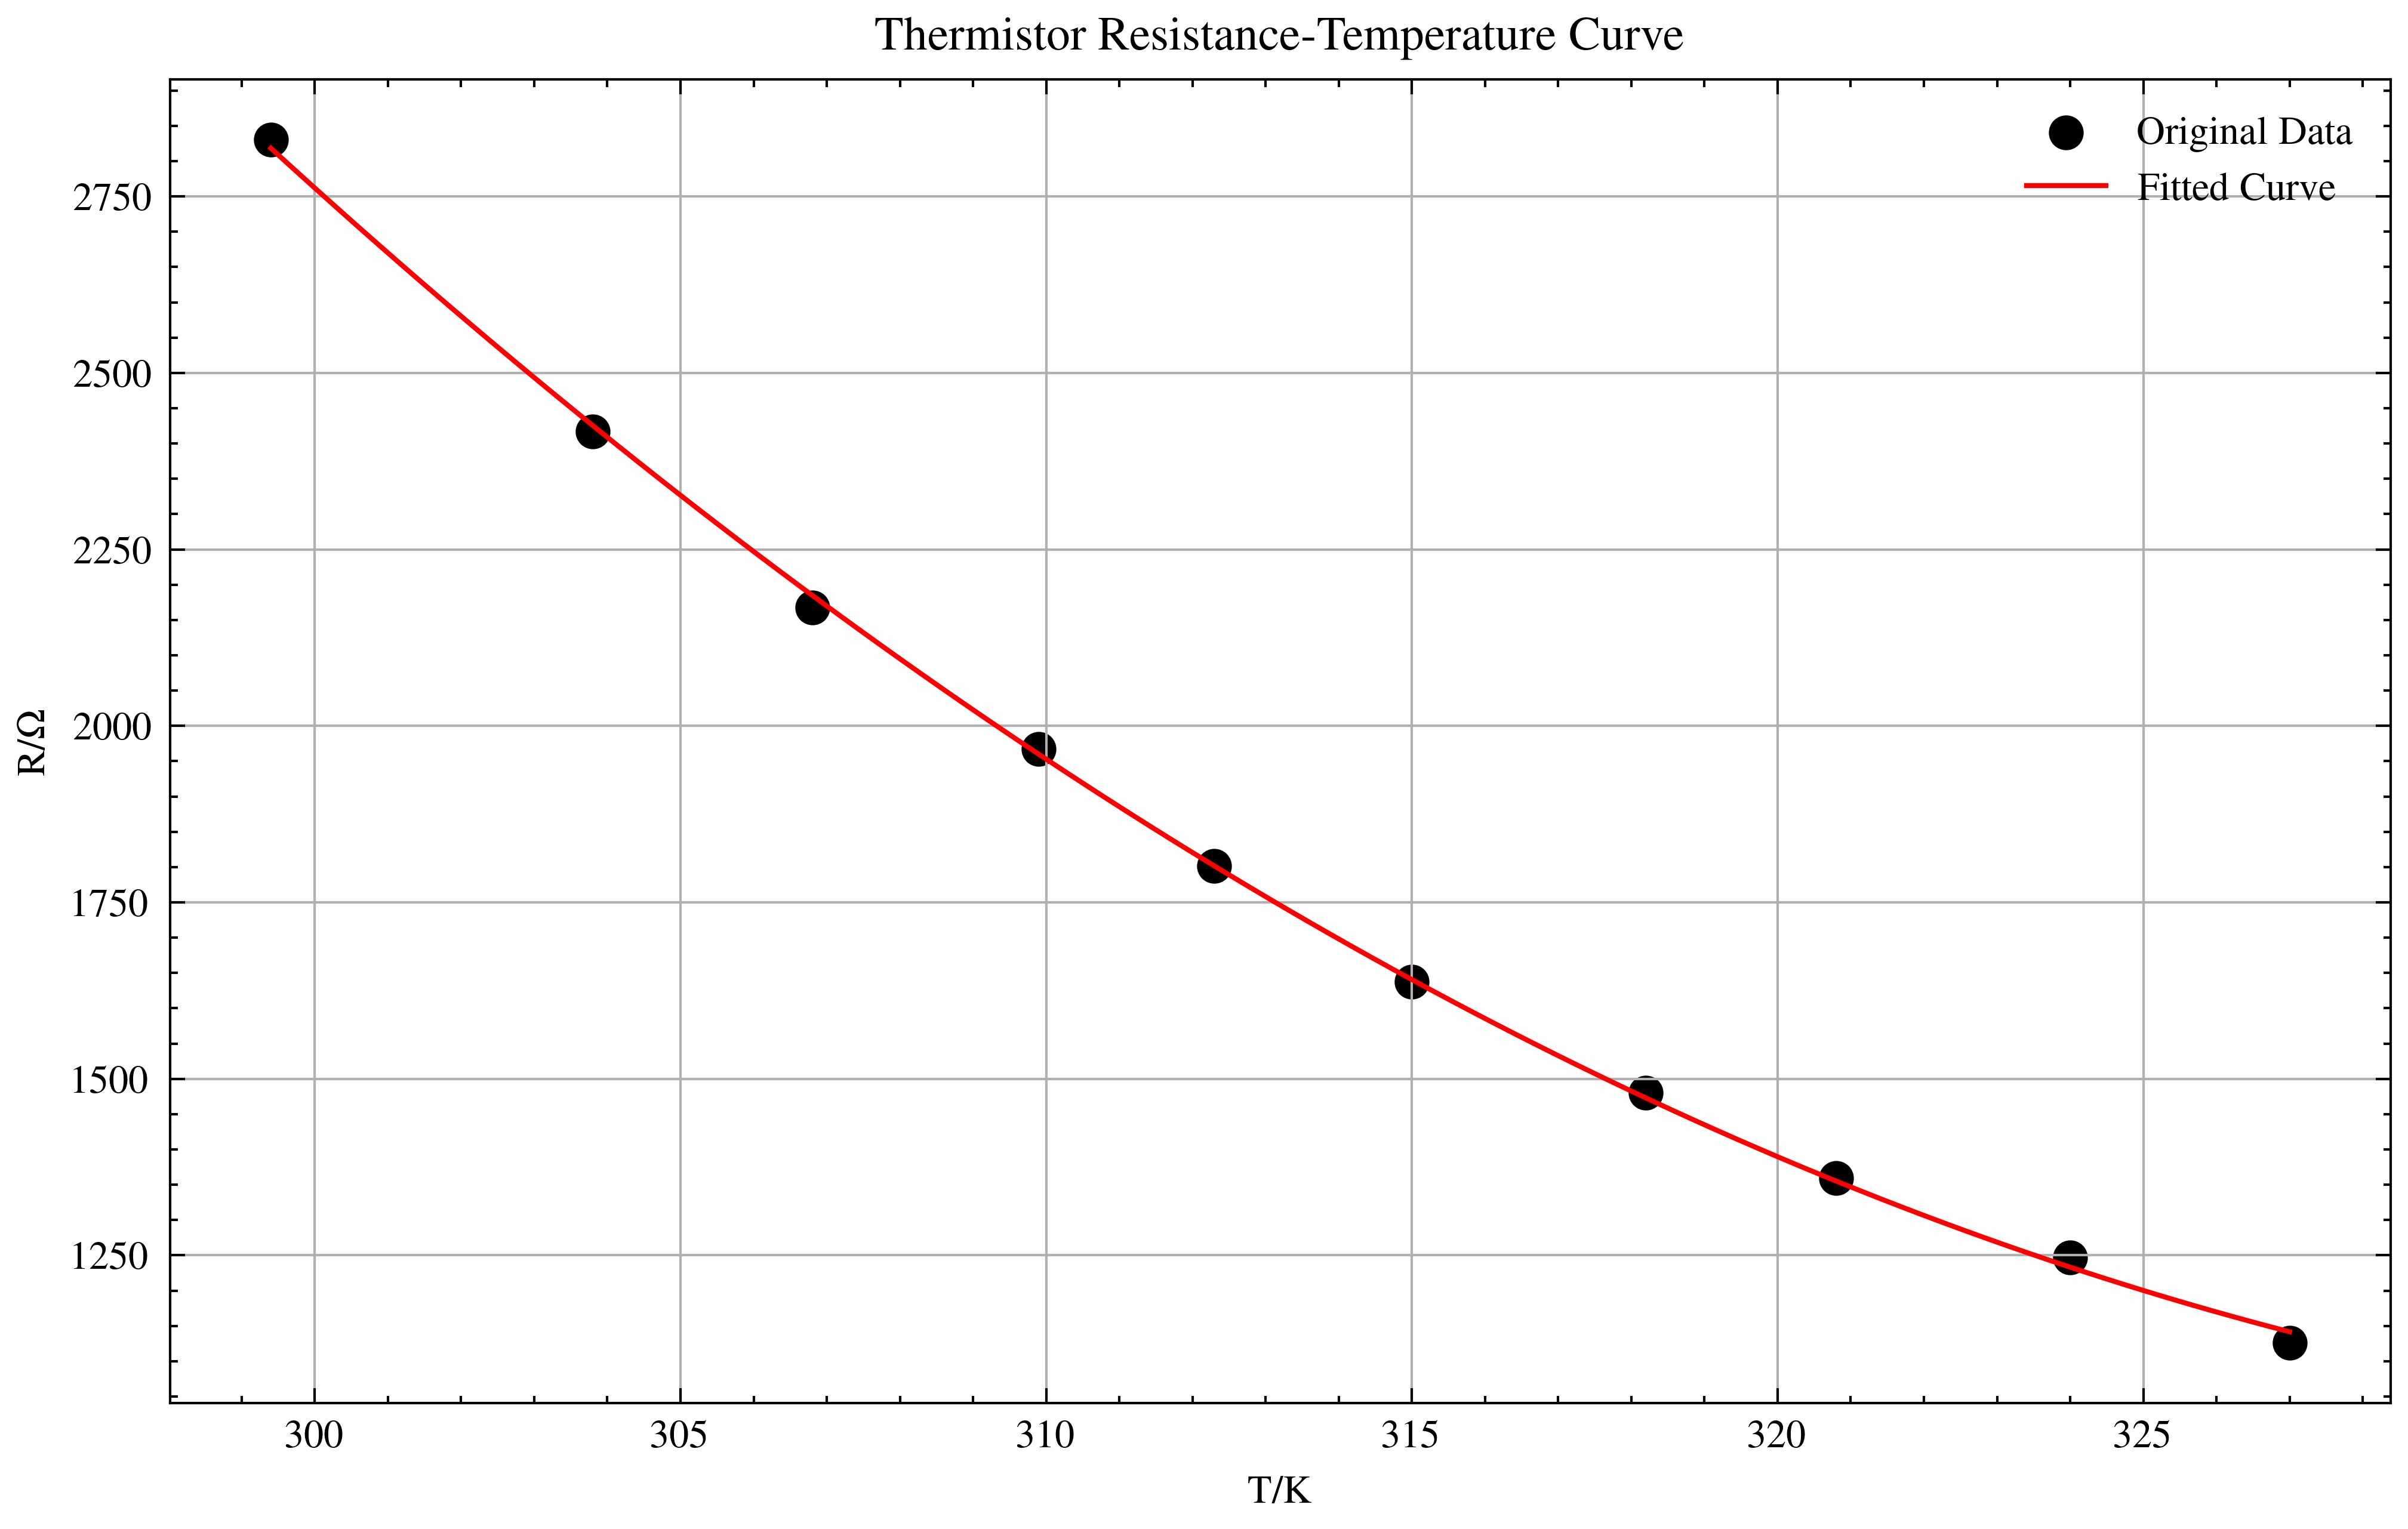

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'ieee',
 'latex-sans',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10',
 'turkish-font']

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

"""多项式拟合"""
t = np.array([26.4,30.8,33.8,36.9,39.3,42.0,45.2,47.8,51,54])+273
U = np.array([0.02,-16.80,-29.89,-42.7,-55.35,-70.19,-87.43,-103.14,-120.18,-142.17]) / 1000
RX = (U * 2930 * 2930)/(2.998 * 100 - U * 2930) + 2830

# 使用 curve_fit 进行曲线拟合
params, covariance =  curve_fit(quadratic_function, t, RX)

# 通过拟合得到的参数，生成拟合曲线上的点
fit_t = np.linspace(min(t), max(t), 100)
fit_RX = quadratic_function(fit_t , *params)

# 绘制原始数据和拟合曲线
plt.style.use('ieee')
plt.figure(figsize=(8,4.8))
plt.scatter(t, RX, label='Original Data')
plt.plot(fit_t , fit_RX, 'r-', label='Fitted Curve')

plt.xlabel('T/K')
plt.ylabel('R/$\Omega$')
plt.title('Thermistor Resistance-Temperature Curve')
plt.legend()
plt.grid()
plt.show()
plt.style.available

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
np.random.seed(42)
x_1 = np.random.normal(0,1,100)
x_2 = np.random.normal(0,1,100)
x_3 = np.random.normal(0,1,100)
eps = np.random.normal(0,0.1,100)
X = np.array([x_1,x_2,x_3]).T  # X = np.c_[x_1,x_2,x_3] 
y = np.dot(X, [0.1, 0.2, 0.7]) + eps # y, eps自动变成行向量
X_model = sm.add_constant(X)
model = sm.OLS(y, X_model)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2658.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.28e-92
Time:                        09:30:00   Log-Likelihood:                 102.80
No. Observations:                 100   AIC:                            -197.6
Df Residuals:                      96   BIC:                            -187.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.009      0.981      0.3

([<matplotlib.patches.Wedge at 0x1a215e03690>,
 [Text(0.9801071672559598, 0.4993895680663527, 'apple'),
  Text(-0.33991877217145816, 1.046162142464278, 'orange'),
  Text(-0.49938947630209474, -0.9801072140121813, 'banana'),
  Text(1.0461621822461364, -0.3399186497354948, 'watermelon')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.00%'),
  Text(-0.18541023936624987, 0.5706338958896061, '30.00%'),
  Text(-0.27239425980114257, -0.5346039349157352, '45.00%'),
  Text(0.5706339175888016, -0.18541017258299716, '10.00%')])

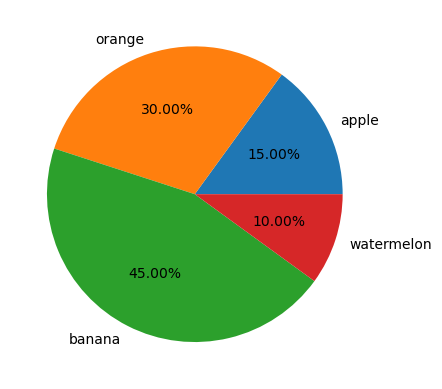

In [37]:
import matplotlib.pyplot as plt
import numpy as np
sizes = [15,30,45,10]
plt.pie(sizes, explode=(0,0,0,0), labels=['apple', 'orange','banana', 'watermelon'],autopct='%1.2f%%')

<Figure size 2560x1920 with 0 Axes>

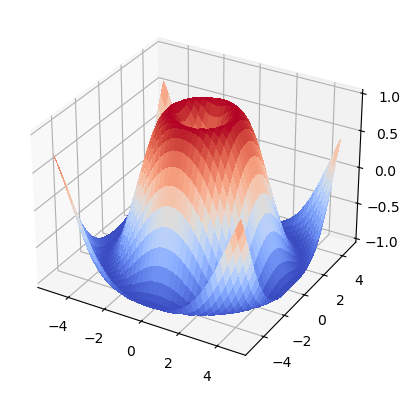

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
x1 = np.arange(-5, 5,0.25)
y1 = np.arange(-5,5,0.25)
x1,y1 = np.meshgrid(x1, y1)
r1 = np.sqrt(x1**2 + y1**2)
z1 = np.sin(r1)
plt.figure(figsize=(12.8,9.6), dpi=200)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制曲面图
ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm, linewidth=0,antialiased=False)
#设置z轴刻度的范围、位置、格式
ax.set_zlim(-1.01,1.01)
plt.show()

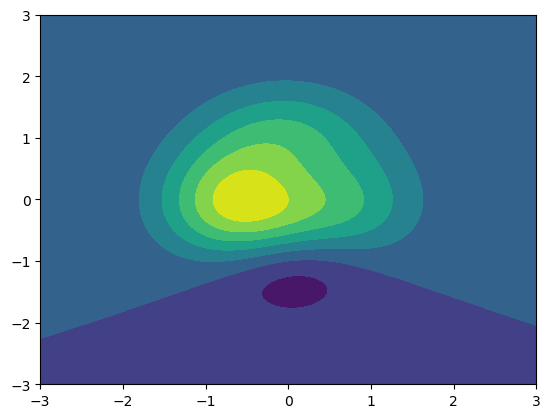

In [59]:
import numpy as np
import matplotlib.pyplot as plt
#计算x,y坐标对应的高度值
def fun(x,y):
    return (1-x/2+x**2+y**3) * np.exp(-x**2-y**2)
#设置个背景色
plt.figure()
n=256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
# 把x,y数据转换为二维数据《网格化)
X, Y = np.meshgrid(x, y)
#填充等高线
plt.contourf(X, Y, fun(X, Y))
# 显示图表
plt.show()

In [ ]:
#模型下载
from modelscope import snapshot_download
model_dir = snapshot_download('AI-ModelScope/stable-diffusion-2-1')

2023-12-06 08:43:50,121 - modelscope - INFO - PyTorch version 2.0.1 Found.
2023-12-06 08:43:50,123 - modelscope - INFO - Loading ast index from C:\Users\Xie Yuejin\.cache\modelscope\ast_indexer
2023-12-06 08:43:50,176 - modelscope - INFO - Loading done! Current index file version is 1.9.5, with md5 3da98de6a58af752d71f2e263697a863 and a total number of 945 components indexed
2023-12-06 08:43:50,805 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0
Downloading:   0%|          | 0.00/3.23G [00:00<?, ?B/s]

In [4]:
import matplotlib
print(matplotlib.get_configdir())

''